In [1]:
# ==============imports===================
import pandas as pd
import os

import matplotlib.pyplot as plt

import matplotlib.ticker as mtick
import seaborn as sns
from scipy.stats import pearsonr, spearmanr

In [2]:
# ==================args=====================
# checkpoints = ['50000', '100000', '150000', '200000']
# checkpoints = ['1000', '10000', '100000', '200000', '300000', '400000', '500000', '600000']
# checkpoints = ['1000', '100000', '200000', '300000', '400000', '600000']

# plt.style.use('ggplot')

{'Gender': {'best': 0.2385714285714285, '1000': 0.0735714285714285, '100000': 0.1385714285714286, '200000': 0.1635714285714285, '300000': 0.1892857142857142, '400000': 0.1957142857142857, '600000': 0.0578571428571428}, 'Number': {'best': 0.1974545454545454, '1000': 0.0712727272727272, '100000': 0.1283636363636363, '200000': 0.1567272727272727, '300000': 0.1556363636363636, '400000': 0.168, '600000': 0.0512727272727272}, 'POS': {'best': 0.1351282051282051, '1000': 0.0594871794871794, '100000': 0.0882051282051282, '200000': 0.0946153846153846, '300000': 0.1205128205128205, '400000': 0.1328205128205128, '600000': 0.0435897435897435}}
[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.0735714285714285, 0.1385714285714286, 0.1635714285714285, 0.1892857142857142, 0.1957142857142857, 0.0578571428571428])
[1000, 100000, 200000, 300000, 400000, 600000]
dict_values([0.0712727272727272, 0.1283636363636363, 0.1567272727272727, 0.1556363636363636, 0.168, 0.0512727272727272])
[1000, 10000

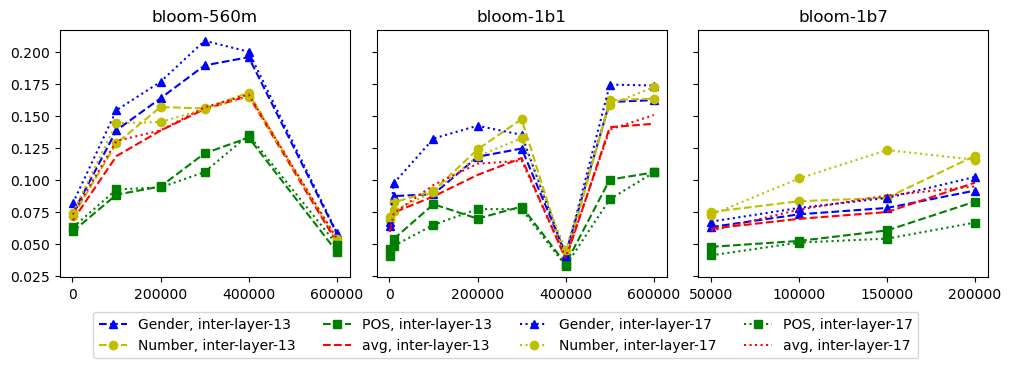

In [6]:
# ======================#1 alignment plot#==============================
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(10,3))
model_index = 0
for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:

    lines = ['--', ':']
    line_index = 0
    for l in ['inter-layer-13', 'inter-layer-17']:


        ovlp_dict = pd.read_csv(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ctgr.csv', index_col=0).to_dict()

        print(ovlp_dict)
        shapes = {'Gender':'^', 'Number':'o', 'POS':'s'}
        colors = {'Gender':'b', 'Number':'y', 'POS':'g'}
        attr_index = 0
        for attr, avg_ovlp_rate in ovlp_dict.items():
            del avg_ovlp_rate['best']
            x = [int(x) for x in avg_ovlp_rate.keys()]
            y = avg_ovlp_rate.values()
            print(x)
            print(y)
            axs[model_index].plot(x, y, f"{colors[attr]}{shapes[attr]}{lines[line_index]}", label=f'{attr}, {l}')
            axs[model_index].set_title(model)
            attr_index += 1


        with open(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ckpt.txt', 'r') as f:
            read_lines = f.readlines()
            avg_ovlp_dict = {}
            for line in read_lines:
                split_list = line.split(',')
                if split_list[0] == 'best':
                    continue
                avg_ovlp_dict[int(split_list[0])] = float(split_list[1])
            ckpts, avg_ovlps = zip(*avg_ovlp_dict.items())
            axs[model_index].plot(ckpts, avg_ovlps, f"r{lines[line_index]}", label=f'avg, {l}')
        line_index += 1
    
    model_index += 1

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = "upper center",
   bbox_to_anchor = (0.5, 0),
   bbox_transform = plt.gcf().transFigure,
   ncol=4
)

plt.savefig(f'experiments/scatterplots/alignment.pdf', bbox_inches='tight')

In [10]:
def print_pearson(variable_list_1, variable_list_2):
    pearson_corr, pearson_p_value = pearsonr(variable_list_1, variable_list_2)
    print('Pearsons correlation: %.3f' % pearson_corr)
    print('Pearsons P value: %.3f' % pearson_p_value)
    print('Pearsons P value: %.3e' % pearson_p_value)
    return pearson_corr, pearson_p_value

def print_spearman(variable_list_1, variable_list_2):
    spearman_corr, spearman_p_value = spearmanr(variable_list_1, variable_list_2)
    print('Spearmans correlation: %.3f' % spearman_corr)
    print('Spearmans P value: %.3f' % spearman_p_value)
    print('Spearmans P value: %.3e' % spearman_p_value)
    return spearman_corr, spearman_p_value

def add_identity(axes, *line_args, **line_kwargs):
    low_x, high_x = axes.get_xlim()
    low_y, high_y = axes.get_ylim()
    x = [low_x, high_x]
    y = [low_y, high_y]
    axes.plot(x, y, *line_args, **line_kwargs)
    # identity, = axes.plot([], [], *line_args, **line_kwargs)
    # def callback(axes):
    #     low_x, high_x = axes.get_xlim()
    #     low_y, high_y = axes.get_ylim()
    #     low = max(low_x, low_y)
    #     high = min(high_x, high_y)
    #     identity.set_data([low, high], [low, high])
    # callback(axes)
    # axes.callbacks.connect('xlim_changed', callback)
    # axes.callbacks.connect('ylim_changed', callback)
    # return axes

(0.07041763791763792, 0.12428893328893328, 0.13837995337995337, 0.1558021423021423, 0.16602231102231105, 0.05238999888999889)
[0.4145209580838323, 0.5692864271457085, 0.5034181636726547, 0.6194860279441118, 0.4908433133732535, 0.3527944111776447]
bloom-560m XNLI Average:
Pearsons correlation: 0.808
Pearsons P value: 0.052
Pearsons P value: 5.197e-02
Spearmans correlation: 0.600
Pearsons P value: 0.208
Spearmans P value: 2.080e-01
[0.30007194456874814, 0.4308753123748261, 0.461252566644333, 0.45239087982412124, 0.4345825403835825, 0.22342748787736103]
bloom-560m POS Average:
Pearsons correlation: 0.940
Pearsons P value: 0.005
Pearsons P value: 5.292e-03
Spearmans correlation: 0.771
Pearsons P value: 0.072
Spearmans P value: 7.240e-02
(0.05928921078921079, 0.07398312798312798, 0.09131951381951381, 0.10803807303807304, 0.11580325230325231, 0.03843795093795094, 0.14005710955710954, 0.1471054501054501)
[0.45870758483033935, 0.5370508982035929, 0.5627744510978044, 0.5250499001996008, 0.61334

/tmp/ipykernel_2208/2095513643.py:44: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
/tmp/ipykernel_2208/2095513643.py:44: MatplotlibDeprecationWarning: The join function was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])


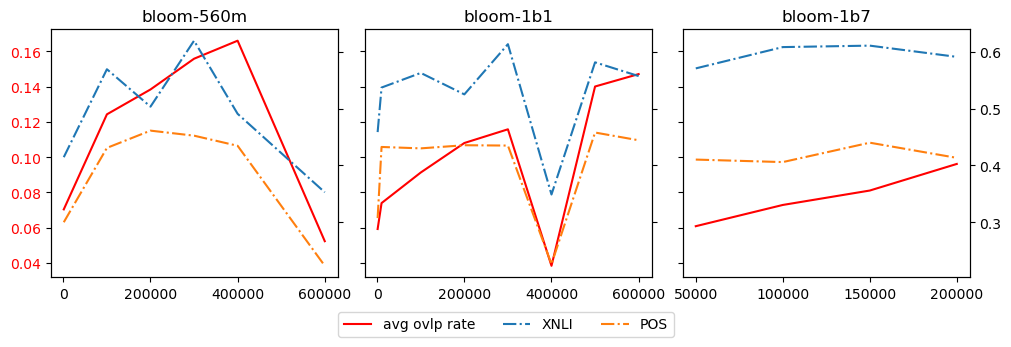

In [11]:
# ======================#2 correlation plot - curve#==============================
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(10,3))
model_index = 0
axs_dup = [ax.twinx() for ax in axs]
for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:
    avg_alignment = {}
    for l in ['inter-layer-13', 'inter-layer-17']:

        with open(f'csv_files/{model}_{l}_avg-ovlp-rate-by-ckpt.txt', 'r') as f:
            read_lines = f.readlines()
            avg_ovlp_dict = {}
            for line in read_lines:
                split_list = line.split(',')
                if split_list[0] == 'best':
                    continue
                if int(split_list[0]) not in avg_alignment:
                    avg_alignment[int(split_list[0])] = 0
                avg_alignment[int(split_list[0])] += float(split_list[1])

    for k, v in avg_alignment.items():
        avg_alignment[k] = v/2
            
    ckpts, avg_ovlps = zip(*avg_alignment.items())
    axs[model_index].plot(ckpts, avg_ovlps, "r-", label='avg ovlp rate')
    var_1 = avg_ovlps
    print(var_1)

    task_name_dict = {"XNLI": 'xnli_acc', "POS": 'f1-score'}
    for task in ["XNLI", "POS"]:
        score_dict = pd.read_csv(f'csv_files/{model}_{task_name_dict[task]}.csv', index_col=0)
        avg_scores = score_dict.mean(axis=0).to_dict()
        if 'best' in avg_scores:
            del avg_scores['best']
        x = [int(k) for k in avg_scores.keys()]
        y = avg_scores.values()
        var_2 = list(y)
        print(var_2)
        axs_dup[model_index].plot(x, y, "-.", label=task)     
        print(f"{model} {task} Average:")
        print_pearson(var_1, var_2)
        print_spearman(var_1, var_2)
        
    if model_index < 2:
        axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
    axs[model_index].set_title(model)
    axs[model_index].tick_params(axis='y', labelcolor='red')
    
    model_index += 1

axs_dup[0].set_yticklabels([])
axs_dup[1].set_yticklabels([])

labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = "upper center",
   bbox_to_anchor = (0.5, 0),
   bbox_transform = plt.gcf().transFigure,
   ncol=3
)

# plt.savefig(f'experiments/scatterplots/crslgual_curve.pdf', bbox_inches='tight')

In [3]:
lang_color_dict = {}

[0.19, 0.06, 0.07, 0.12000000000000001, 0.15, 0.18, 0.05, 0.21000000000000002, 0.09, 0.18, 0.14, 0.15, 0.21000000000000002, 0.06, 0.14, 0.05, 0.07, 0.08, 0.1, 0.07, 0.03, 0.24, 0.09, 0.18, 0.30000000000000004, 0.22999999999999998, 0.23, 0.06, 0.14, 0.07, 0.05, 0.07, 0.1, 0.12, 0.04, 0.04, 0.01, 0.02, 0.04, 0.04, 0.07, 0.05, 0.33999999999999997, 0.08, 0.14, 0.19, 0.2, 0.24, 0.1, 0.07, 0.06, 0.07, 0.05, 0.1, 0.1, 0.06999999999999999, 0.16999999999999998, 0.08, 0.07, 0.09, 0.08, 0.14, 0.02, 0.14, 0.08, 0.07, 0.16999999999999998, 0.12000000000000001, 0.22, 0.06, 0.2, 0.05, 0.1, 0.18, 0.18, 0.22000000000000003, 0.0]
[0.0114291368775202, 0.1947043937566874, 0.2789352579497303, 0.3568747964255873, 0.2634427520568374, 0.3008503792231671, 0.1377541674299322, 0.6897495822259495, 0.304712783171521, 0.6596787638254724, 0.7071290944123315, 0.7278070780757098, 0.7015486560941107, 0.194896967989263, 0.3518200592172377, 0.3233300563977854, 0.3555959267581393, 0.3549286297880521, 0.3644519883608147, 0.

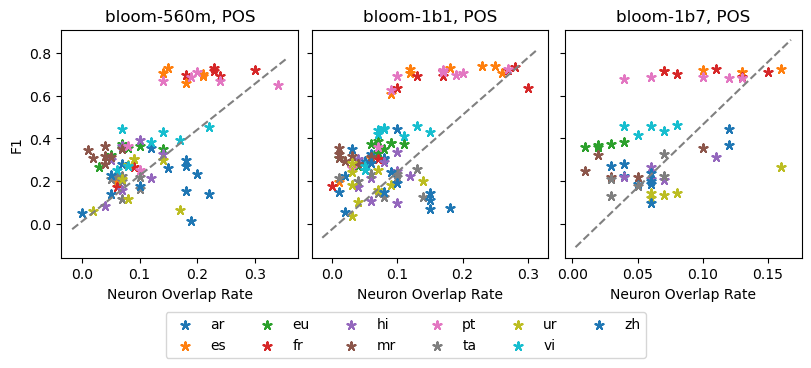

In [11]:
# ======================#3 correlation plot - scatter#==============================
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(8,3))
model_index = 0
task = 'f1-score' #'xnli_acc'

for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:
    var_1 = []
    var_2 = []
    
    avg_ovlp = pd.read_csv(f'csv_files/{model}_inter-layer-13_ovlp-rate_POS.csv', index_col=0)
    ovlp_df = pd.read_csv(f'csv_files/{model}_inter-layer-17_ovlp-rate_POS.csv', index_col=0)
    avg_ovlp = avg_ovlp.add(ovlp_df, fill_value=0)/2

    score_df = pd.read_csv(f'csv_files/{model}_{task}.csv', index_col=0)
    for lang in score_df.index:
        if lang == 'en':
            continue
        x = [] # score
        y = [] # ovlp
        for ckpt in score_df.columns:
            y.append(score_df[ckpt][lang])
            x.append(avg_ovlp[ckpt][lang])

        s = axs[model_index].scatter(x, y, marker=(5, 2), label=lang)
        var_1 += x
        var_2 += y

        lang_color_dict[lang] = s.get_facecolor()[0]
        axs[model_index].set_title(f'{model}, POS')
        axs[model_index].set_xlabel('Neuron Overlap Rate')
        
        
            


    # task_name_dict = {"XNLI": 'xnli_acc', "POS": 'f1-score'}
    # for task in ["XNLI", "POS"]:
    #     score_dict = pd.read_csv(f'csv_files/{model}_{task_name_dict[task]}.csv', index_col=0)
    #     avg_scores = score_dict.mean(axis=0).to_dict()
    #     if 'best' in avg_scores:
    #         del avg_scores['best']
    #     x = [int(k) for k in avg_scores.keys()]
    #     y = avg_scores.values()
    #     print(x)
    #     print(y)
    #     axs_dup[model_index].plot(x, y, "-.", label=task)     
    # if model_index < 2:
    #     axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
    # axs[model_index].set_title(model)
    # axs[model_index].tick_params(axis='y', labelcolor='red')
    print(var_1)
    print(var_2)
    print(f"{model} POS Pairwise:")
    print_pearson(var_1, var_2)
    print_spearman(var_1, var_2)
    
    model_index += 1

axs[0].set_ylabel('F1')
labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

for i in range(0,3):
    add_identity(axs[i], color='grey', ls='--')

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = "upper center",
   bbox_to_anchor = (0.5, 0),
   bbox_transform = plt.gcf().transFigure,
   ncol=6
)

plt.savefig(f'experiments/scatterplots/crslgual_scatter_POS.pdf', bbox_inches='tight')

In [80]:
print(lang_color_dict)

{'ar': array([0.12156863, 0.46666667, 0.70588235, 1.        ]), 'es': array([1.        , 0.49803922, 0.05490196, 1.        ]), 'eu': array([0.17254902, 0.62745098, 0.17254902, 1.        ]), 'fr': array([0.83921569, 0.15294118, 0.15686275, 1.        ]), 'hi': array([0.58039216, 0.40392157, 0.74117647, 1.        ]), 'mr': array([0.54901961, 0.3372549 , 0.29411765, 1.        ]), 'pt': array([0.89019608, 0.46666667, 0.76078431, 1.        ]), 'ta': array([0.49803922, 0.49803922, 0.49803922, 1.        ]), 'ur': array([0.7372549 , 0.74117647, 0.13333333, 1.        ]), 'vi': array([0.09019608, 0.74509804, 0.81176471, 1.        ]), 'zh': array([0.12156863, 0.46666667, 0.70588235, 1.        ])}


[0.06, 0.07, 0.12000000000000001, 0.15, 0.18, 0.05, 0.09, 0.18, 0.14, 0.15, 0.21000000000000002, 0.06, 0.09, 0.18, 0.30000000000000004, 0.22999999999999998, 0.23, 0.06, 0.07, 0.05, 0.07, 0.1, 0.12, 0.04, 0.08, 0.07, 0.09, 0.08, 0.14, 0.02, 0.08, 0.07, 0.16999999999999998, 0.12000000000000001, 0.22, 0.06, 0.05, 0.1, 0.18, 0.18, 0.22000000000000003, 0.0]
[0.3834331337325349, 0.5059880239520959, 0.3365269461077844, 0.5716566866267465, 0.3341317365269461, 0.325748502994012, 0.4730538922155688, 0.5888223552894212, 0.6039920159680638, 0.7099800399201597, 0.7259481037924151, 0.3874251497005988, 0.4161676646706587, 0.7, 0.6668662674650698, 0.7037924151696606, 0.7177644710578842, 0.3269461077844311, 0.3642714570858283, 0.3726546906187625, 0.3437125748502994, 0.4892215568862275, 0.3369261477045908, 0.3317365269461078, 0.3201596806387226, 0.3874251497005988, 0.3365269461077844, 0.506187624750499, 0.3391217564870259, 0.3291417165668662, 0.4073852295409181, 0.65249500998004, 0.3387225548902196, 0.6

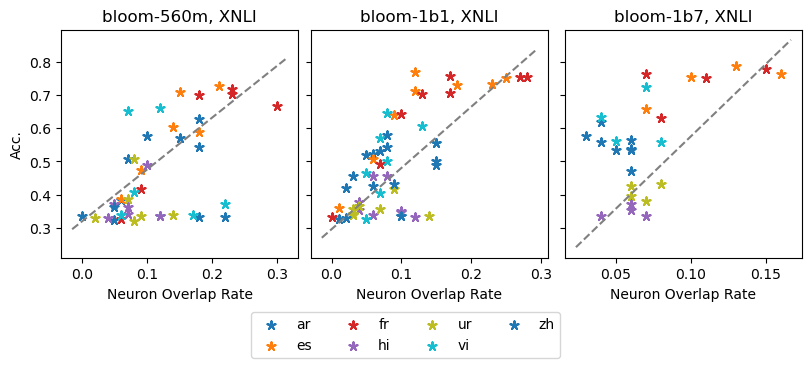

In [12]:
# ======================#3 correlation plot - scatter#==============================
fig, axs = plt.subplots(1, 3, sharex=False, sharey=True, layout="constrained", figsize=(8,3))
model_index = 0
task = 'xnli_acc'

for model in ['bloom-560m', 'bloom-1b1', 'bloom-1b7']:
    var_1 = []
    var_2 = []
    
    avg_ovlp = pd.read_csv(f'csv_files/{model}_inter-layer-13_ovlp-rate_POS.csv', index_col=0)
    ovlp_df = pd.read_csv(f'csv_files/{model}_inter-layer-17_ovlp-rate_POS.csv', index_col=0)
    avg_ovlp = avg_ovlp.add(ovlp_df, fill_value=0)/2

    score_df = pd.read_csv(f'csv_files/{model}_{task}.csv', index_col=0)
    for lang in score_df.index:
        if lang == 'en':
            continue
        x = [] # score
        y = [] # ovlp
        for ckpt in score_df.columns:
            y.append(score_df[ckpt][lang])
            x.append(avg_ovlp[ckpt][lang])

        s = axs[model_index].scatter(x, y, color=lang_color_dict[lang], marker=(5, 2), label=lang)
        var_1 += x
        var_2 += y
        lang_color_dict[lang] = s.get_facecolor()[0]
        axs[model_index].set_title(f'{model}, XNLI')
        axs[model_index].set_xlabel('Neuron Overlap Rate')
            


    # task_name_dict = {"XNLI": 'xnli_acc', "POS": 'f1-score'}
    # for task in ["XNLI", "POS"]:
    #     score_dict = pd.read_csv(f'csv_files/{model}_{task_name_dict[task]}.csv', index_col=0)
    #     avg_scores = score_dict.mean(axis=0).to_dict()
    #     if 'best' in avg_scores:
    #         del avg_scores['best']
    #     x = [int(k) for k in avg_scores.keys()]
    #     y = avg_scores.values()
    #     print(x)
    #     print(y)
    #     axs_dup[model_index].plot(x, y, "-.", label=task)     
    # if model_index < 2:
    #     axs_dup[model_index].get_shared_y_axes().join(axs_dup[model_index], axs_dup[model_index+1])
    # axs[model_index].set_title(model)
    # axs[model_index].tick_params(axis='y', labelcolor='red')
    print(var_1)
    print(var_2)
    print(f"{model} XNLI Pairwise:")
    print_pearson(var_1, var_2)
    print_spearman(var_1, var_2)
    
    model_index += 1
axs[0].set_ylabel('Acc.')
labels_handles = {
  label: handle for ax in fig.axes for handle, label in zip(*ax.get_legend_handles_labels())
}

for i in range(0,3):
    add_identity(axs[i], color='grey', ls='--')

fig.legend(
  labels_handles.values(),
  labels_handles.keys(),
  loc = "upper center",
   bbox_to_anchor = (0.5, 0),
   bbox_transform = plt.gcf().transFigure,
   ncol=4
)

plt.savefig(f'experiments/scatterplots/crslgual_scatter_XNLI.pdf', bbox_inches='tight')